[Reference Link](https://colab.research.google.com/github/apache/beam/blob/master/examples/notebooks/get-started/learn_beam_basics_by_doing.ipynb#scrollTo=30l8_MD-undP)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/LSSP_code/project/MultiLingualTranslation")

Mounted at /content/drive


In [ ]:
! pip install --quiet apache-beam
! pip install --quiet transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 838.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 12.4 MB/

In [ ]:
import apache_beam as beam
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

import logging
logging.root.setLevel(logging.ERROR)


from utils.evaluate import Evaluate

ModuleNotFoundError: No module named 'utils.evaluate'

In [ ]:

input_file = './dataset.txt'

# lines_to_write = [
#     "In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.",
#     "Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.",
#     "Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.",
#     "Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.",
#     "Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.",
#     "Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.",
#     "Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.",
#     "In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everything that dares to venture too close.",
#     "But amidst the chaos and violence of the cosmos, there exists a rare beauty, a harmony that transcends the boundaries of time and space.",
#     "Stars are born in fiery explosions of light and energy, their radiance illuminating the darkness of the void.",
#     "And in their death, they scatter the building blocks of life, seeding the cosmos with the raw materials from which new worlds will one day arise.",
#     "Throughout the ages, civilizations have gazed upon the stars with wonder and awe, seeking to unlock the secrets of the universe.",
#     "And though the cosmos may seem vast and unknowable, it is also a place of boundless possibility, where the dreams of humanity can take flight and soar among the stars.",
#     "In this vast celestial expanse, the wonders of the universe await discovery, beckoning explorers to journey beyond the confines of their world and into the unknown depths of space.",
#     "From distant galaxies to the smallest subatomic particles, the cosmos is a playground of infinite diversity, offering endless opportunities for exploration and discovery.",
#     "And as humanity ventures further into the cosmos, new mysteries and wonders await, challenging our understanding of the universe and our place within it.",
#     "For in the grand tapestry of the cosmos, every star, planet, and galaxy has a story to tell, a history written in the language of physics and mathematics.",
#     "And as we unravel these mysteries, we come to understand not only the nature of the universe, but also ourselves, and our place within the vastness of creation,"
# ]

# with open(input_file, 'w') as file:
#     for line in lines_to_write:
#         file.write(line + '\n')

#     file.close()

# ! cat dataset.txt

In [ ]:
model_name = 'facebook/nllb-200-distilled-1.3B'

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import time

# class llm_conversion():
#     def __init__(self, source, target):
#         self.source = source
#         self.target = target

#         self.llm_pipeline_forward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=source, tgt_lang=target)
#         self.llm_pipeline_backward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=target, tgt_lang=source)

#         self.input_stream = ""
#         self.output_stram = ""

#         self.conversion_time = []
#         self.input_size = []


#     def infer_forward(self, text):
#         self.input_stream = self.input_stream + text

#         start = time.time()
#         output = self.llm_pipeline_forward(text, max_length=1000)

#         self.conversion_time.append(time.time() - start)
#         self.input_size.append(len(text))

#         translated_text = output[0]['translation_text']

#         return translated_text


#     def infer_backward(self, text):
#         output = self.llm_pipeline_backward(text, max_length=1000)
#         translated_text = output[0]['translation_text']

#         self.output_stram = self.output_stram + text

#         return translated_text


#     def get(self):
#         print(self.input_stream)
#         print()
#         print(self.output_stram)

# source = "eng_Latn"
# target = "hin_Deva"

# obj = llm_conversion(source, target)


source = "eng_Latn"
target = "hin_Deva"

llm_pipeline_forward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=source, tgt_lang=target)
llm_pipeline_backward = pipeline('translation', model=model, tokenizer=tokenizer, src_lang=target, tgt_lang=source)

input_stream = ""
output_stream = ""

conversion_time = []
input_size = []


def infer_forward(text):
    global input_stream, conversion_time, input_size

    input_stream = input_stream + text

    start = time.time()
    output = llm_pipeline_forward(text, max_length=1000)

    conversion_time.append(time.time() - start)
    input_size.append(len(text))

    translated_text = output[0]['translation_text']

    return translated_text


def infer_backward(text):
    global output_stream

    output = llm_pipeline_backward(text, max_length=1000)
    translated_text = output[0]['translation_text']

    output_stream = output_stream + translated_text

    return translated_text


def get():
    print(input_stream)
    print()
    print(output_stream)


In [ ]:
beam_pipeline = beam.Pipeline()

output_file_name = "output"

outputs = (
    beam_pipeline
      | 'read the dataset' >> beam.io.ReadFromText(input_file)
      | 'forward translation' >> beam.Map(infer_forward)
      | 'backward translation' >> beam.Map(infer_backward)
      # | 'write results 2' >> beam.io.WriteToText(output_file_name, file_name_suffix = ".txt")
      # | 'print the text file name' >> beam.Map(print)
)

beam_pipeline.run()

In [ ]:
get()

metric = Evaluate()

print(metric.jaccard_similarity(input_stream, output_stream))
print(metric.cosine_similarity(input_stream, output_stream))
print(metric.eucledian_distance(input_stream, output_stream))

In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devouring everything that

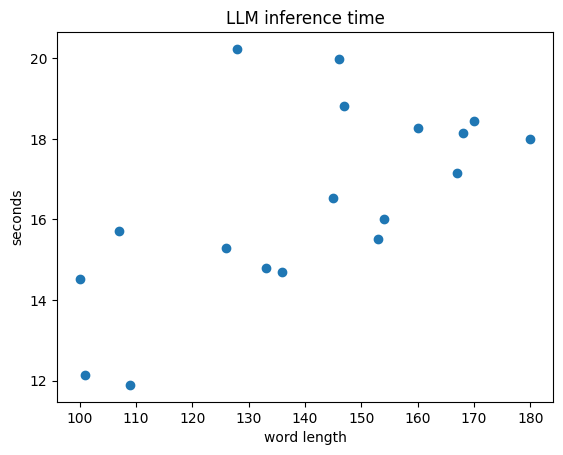

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(input_size, conversion_time, marker='o')

plt.xlabel('word length')
plt.ylabel('seconds')
plt.title('LLM inference time')

plt.show()

In [ ]:
print("original text")
! cat dataset.txt

print("\n\n\n")
print("translated text")
! cat output-00000-of-00001.txt

original text
In the vast expanse of the cosmos, among the countless stars and galaxies that stretch beyond the reaches of imagination, there exists a tapestry of wonder and mystery.
Within this cosmic quilt, celestial bodies dance to the rhythm of gravity's embrace, weaving intricate patterns across the velvet canvas of space.
Nebulas swirl with colors unseen on Earth, their ethereal beauty captivating the gaze of distant observers.
Planets, each a world unto itself, orbit their parent stars in a delicate ballet of motion and time.
Moons, silent sentinels in the night sky, watch over their planetary companions with quiet vigilance.
Comets streak through the darkness, leaving trails of stardust in their wake as they journey through the cold depths of space.
Asteroids, remnants of ancient collisions, drift silently through the void, silent witnesses to the tumultuous history of the cosmos.
In the depths of the cosmos, black holes lurk like cosmic predators, their gravitational pull devo

In [ ]:
! ls

data  dataset.txt  project.ipynb  testing.ipynb  testing_LLMs.ipynb  utils
